# Tarea 6: Anillos  
### Equipo 11  
<ul>
  <li>Guillermo Arredondo</li>
  <li>Iñaki Fernandez</li>
  <li>Mauricio Vazquez</li>
</ul>

In [1]:
import numpy as np
from sklearn.datasets import make_circles
from sklearn.linear_model import LogisticRegression
import scipy
import sklearn.model_selection as ms
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

Obtener los datos para X, y correspondientes a los círculos deseados  
Sin embargo, renombramos la segunda clase de datos (y = 0) con valor de y = -1 

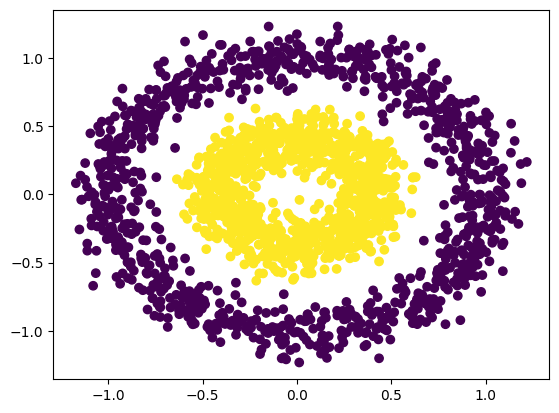

In [2]:
X, y = make_circles(2000, noise = .1, random_state = 123, factor = .4)
y = np.array([-1 if x == 0 else x for x in y])
plt.scatter(X[:,0], X[:,1], c = y)
# plt.plot(X[y==0,0], X[y==0,1], "bo")
# plt.plot(X[y==1,0], X[y==1,1], "yo")

Los comentarios siguientes es el resultado esperado obtenido a través de los modelos de sklearn

In [3]:
# X_new = np.c_[(X,X[:,0]**2,X[:,1]**2)]
# model = LogisticRegression()
# model.fit(X_new,y)

In [4]:
# y_hat = model.predict(X_new)
# plt.scatter(X_new[:,0], X_new[:,1], c = y_hat, cmap=mcolors.ListedColormap(['b', 'y']))
#plt.plot(X_new[y_hat==0,0], X_new[y_hat==0,1], "bo")
#plt.plot(X_new[y_hat==1,0], X_new[y_hat==1,1], "yo")

# Kernel Polinimial  
Se ajusta una función de kernel polinomial generalizado con el coeficiente constante "c" que se designa con valor 1 por default y un grado de polinomio "d" con un default igual a 2

In [5]:
def PolyKernel(x, x_p, c = 1, d=2):
    dot = np.dot(x,x_p)
    res = (dot+c)**d
    return res

# Radial Basis Function Kernel  
Se diseña una función de kernel gaussiano (o radial basis) asignado por default el parámetro gamma igual a un medio y se utiliza la norma euclidiana con la ayuda de np.linalg.norm

In [6]:
def RBFKernel(x,x_p,gamma=0.5):
    sq_eu_dist = np.linalg.norm(x-x_p)
    res = np.exp(-gamma*((sq_eu_dist)**2))
    return res

# Kernel Perceptron  
Definimos una clase para la creación del modelo de KernelPerceptron

In [7]:
class KernelPerceptron:
    def __init__(self, Kernel = PolyKernel, T = 100):
        """Inicializador de modelo para un determinado Kernel (polinomial o gaussiano) 
        y con un cierto número máximo de iteraciones T"""
        self.kernel = Kernel
        self.max_iter = T
        
    def fit(self, X, y):
        """Función ajustadora/de entrenamiento que recibe los datos y las etiquetas
        y utiliza la función kernel que se haya definido para el modelo, asigna
        las variables de alfas (número de errores cometidos por época) así como los 
        correspondientes valores para Y_train y X_train"""
        n = len(X)
        alphas = np.zeros(n)
        for t in trange(self.max_iter):
            for i in range(n):
                xi, yi = X[i], y[i]
                suma_aux = [self.kernel(xi, X[j]) for j in range(n)]
                val = yi*sum(alphas*y*suma_aux)
                if val <= 0:
                    alphas[i] += 1
        self.alphas = alphas 
        self.Y_train = y
        self.X_train = X
        
    def predict(self, X_test):
        """Función de predicción que recibe un conjunto de datos para probar
        y los clasifica en -1 o 1 de acuerdo al ajuste de alpha y la función kernel"""
        n = len(X_test)
        y = np.zeros(n)
        for i in range(n):
            xi = X_test[i]
            y[i] = np.sign(sum(self.alphas[j] * self.Y_train[j] * self.kernel(xi, self.X_train[j]) for j in range(len(self.X_train))))
        return y
    
    def decision(self, X):
        """Función para trazar la frontera de decisión ante un conjunto de valores de X,
        en esta ocasión no clasificamos como -1 o 1 para poder generar una curva de nivel
        circular y bonita"""
        n = len(X)
        y = np.zeros(n)
        for i in range(n):
            xi = X[i]
            y[i] = sum(self.alphas[j] * self.Y_train[j] * self.kernel(xi, self.X_train[j]) for j in range(len(self.X_train)))
        return y

### Kernel Polinomial cuadrático

In [8]:
mymodel_1 = KernelPerceptron(Kernel = PolyKernel, T = 15)
mymodel_1.fit(X,y)

  0%|          | 0/15 [00:00<?, ?it/s]

In [9]:
y_hat_1= mymodel_1.predict(X)
y_hat_1

array([ 1.,  1., -1., ...,  1.,  1.,  1.])

In [10]:
y

array([ 1,  1, -1, ...,  1,  1,  1])

In [11]:
def plot_contour_1(X1_train, X2_train, clf):
    plt.plot(X1_train[:,0], X1_train[:,1], "bo")
    plt.plot(X2_train[:,0], X2_train[:,1], "yo")

    X1, X2 = np.meshgrid(np.linspace(-1.3,1.3,50), np.linspace(-1.3,1.3,50))
    X_ = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
    Z = clf.decision(X_).reshape(X1.shape)
    plt.contour(X1, X2, Z, [0], colors='r', linewidths=2)

    plt.show()

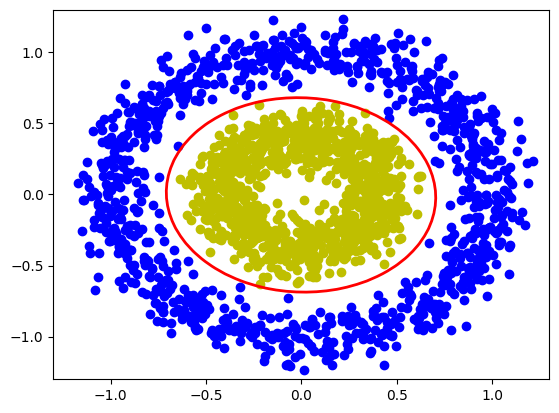

In [12]:
plot_contour_1(X[y_hat_1 == -1], X[y_hat_1 == 1],mymodel_1)

### Kernel Gaussiano

In [13]:
mymodel_2 = KernelPerceptron(Kernel = RBFKernel, T = 15)
mymodel_2.fit(X,y)

  0%|          | 0/15 [00:00<?, ?it/s]

In [14]:
y_hat_2 = mymodel_2.predict(X)
y_hat_2

array([ 1.,  1., -1., ...,  1.,  1.,  1.])

In [15]:
y

array([ 1,  1, -1, ...,  1,  1,  1])

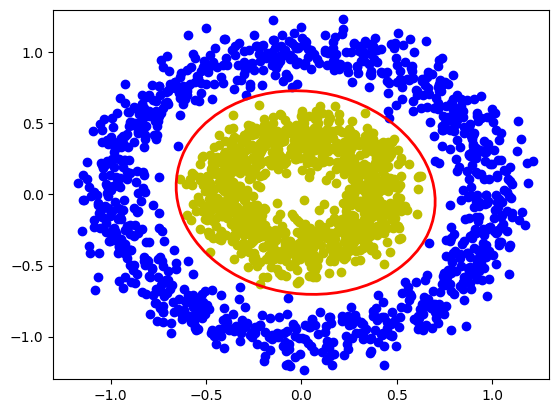

In [16]:
plot_contour_1(X[y_hat_2 == -1], X[y_hat_2 == 1],mymodel_2)

### Entrenando y probando 80-20

In [17]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)

mymodel_1.fit(X_train, y_train)
y_res = mymodel_1.predict(X_test)
aciertos = accuracy_score(y_test, y_res)
print("Aciertos:", aciertos*100, "%")

  0%|          | 0/15 [00:00<?, ?it/s]

Aciertos: 100.0 %


In [18]:
mymodel_2.fit(X_train, y_train)
y_res_2 = mymodel_2.predict(X_test)
aciertos = accuracy_score(y_test, y_res_2)
print("Aciertos:", aciertos*100, "%")

  0%|          | 0/15 [00:00<?, ?it/s]

Aciertos: 100.0 %
